<a href="https://colab.research.google.com/github/bayarpark/hack_healthy_people/blob/sasha_branch/summer_school.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [321]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt

In [119]:
cohort_size = 1000

In [120]:
smoking_low_bound = (25, 35, 45, 55, 65, 75)
smoking_upper_bound = (34, 44, 54, 64, 74, 85)
p_smoking = (19, 22, 16, 12, 15, 11, 6) #19

In [302]:
def is_woman_smoking(age):  
    i, p_index = 0, 0
    sections = list(zip(smoking_low_bound, smoking_upper_bound))

    for section in sections:
        if section[0] <= age <= section[1]:
            p_index = i
            break
        i += 1
    # print(p_index)
    return ss.bernoulli(p=p_smoking[p_index]/100).rvs()

In [122]:
is_woman_smoking(30)

0


0

In [123]:
def create_height():
    height = ss.norm(loc=162, scale= 7).rvs()
    return int(height)

In [124]:
create_height()

163

In [125]:
def create_weight():
    weight = ss.norm(loc=62, scale=9).rvs()
    return int(weight)

In [126]:
create_weight()

63

In [204]:
marriage_low_bound = [25, 30, 35, 40, 45, 50]
marriage_upper_bound = [29, 34, 39, 44, 49, 85]
p_marriage = [27, 35, 20, 6, 4, 5]
p_ever_married = [0.7, 0.8, 0.87, 0.9, 0.92, 0.95]

In [284]:
def first_marriage(age):

    index_list = [0, 1, 2, 3, 4, 5]

    sections = list(zip(marriage_low_bound, marriage_upper_bound))
    p_index, i = 0, 0
    for section in sections:
        if section[0] <= age <= section[1]:
            p_index = i
            if p_index != 0:
                p_index -= 1
            break
        i += 1

    coin = p_ever_married[i]
    married = False
    married = ss.bernoulli(p=coin).rvs()

    if married == False or 0:
        return 0

    index_list_cut = index_list[: p_index + 1]
    p_marriage_cut = p_marriage[:p_index + 1]
    p_marriage_cut = np.array(p_marriage_cut)
    norm = sum(p_marriage_cut)
    norm_p_marriage_cut = p_marriage_cut / norm
    chosen_index = ss.rv_discrete(name='marriage',
                                       values=(index_list_cut,
                                               norm_p_marriage_cut)).rvs()
    sections_variable = sections[chosen_index]
    result = np.random.randint(low= sections_variable[0],
                               high=sections_variable[1])

    return result

In [258]:
def create_marriage_age(age):
    while True:
        a = first_marriage(age)
        if a < age:
            return a
            

In [283]:
create_marriage_age(58)

1


26

In [312]:
def create_menopause(age, smoking):
    start_menopause = ss.norm(loc=49, scale=6).rvs()
    if start_menopause > age:
        return 0
    else:
        if smoking == 0:
            return int(start_menopause)
        else:
            return int(start_menopause - np.random.randint(low=0, high=3))

In [409]:
def create_params_SNP():
    odds = ss.norm(loc=1, scale=0.05).rvs()
    noise = ss.norm(loc=0, scale=0.15).rvs()
    freq = 1.5 - abs(1 - odds) - 1 + noise
    if freq < 0.05:
        freq = 0.05
    if freq > 0.5:
        freq = 0.5
    return [odds, freq]

In [411]:
create_params_SNP()

[0.9325574467154355, 0.5]

In [412]:
def create_SNP_array(SNP_size):
    return [create_params_SNP() for i in range(SNP_size)]

In [415]:
print(*create_SNP_array(1000), sep='\n')

[1.0155750778073103, 0.46309339826493556]
[1.0219588248723985, 0.5]
[0.989493518081718, 0.366028431982766]
[0.9749723583032509, 0.5]
[0.9403061699712227, 0.3682109858289904]
[1.0444149290671607, 0.5]
[0.9985910532476606, 0.5]
[0.991910364452351, 0.5]
[0.9897686922403022, 0.44320994812579406]
[1.0329373605018364, 0.30640372709058206]
[1.0278003080437432, 0.5]
[0.9871073022797304, 0.5]
[0.9988261620876643, 0.5]
[0.9919941770063693, 0.42309940323124196]
[0.9942601327359251, 0.3251876387214861]
[0.949097068309829, 0.4885395679823714]
[1.1143531982867834, 0.49573996497528927]
[0.9820136963551391, 0.15523668220406334]
[1.0697202428351476, 0.4740493379317998]
[0.9363249180756676, 0.3641220758468807]
[1.0032619214547687, 0.362318522044325]
[0.9199591081417245, 0.4555380250913979]
[1.0702131931129057, 0.25466780627747265]
[1.0502386079875246, 0.5]
[1.079050621132612, 0.46055859223254386]
[1.0801142652096187, 0.34197445560634504]
[0.9833016078282371, 0.29237207468545495]
[0.9719298083759295, 0.5

In [419]:
class Woman():
    def __init__(self):
        self.age = np.random.randint(low=25, high=85)
        self.smoking = is_woman_smoking(self.age)
        self.height = create_height()
        self.weight = create_weight()
        self.first_marriage = create_marriage_age(self.age)
        self.menopause = create_menopause(self.age, self.smoking)
        self.SNPs = create_SNP_array(1000)

    def info(self):
        print('age', self.age)
        print('smoking', self.smoking)
        print('height', self.height)
        print('weight', self.weight)
        print('first marriage', self.first_marriage)
        print('start of menopause', self.menopause)
        print('SNP', SNPs)

In [421]:
%%time
res = []

for i in range(10):
    a = Woman()
    res.append(a)

CPU times: user 16.4 s, sys: 317 ms, total: 16.7 s
Wall time: 16 s


In [ ]:
res[0].info()

In [320]:
a.info()

age 40
smoking 0
height 158
weight 62
first marriage 26
start of menopause 0


In [34]:
age = np.random.randint(100, size=cohort_size)

In [ ]:
age

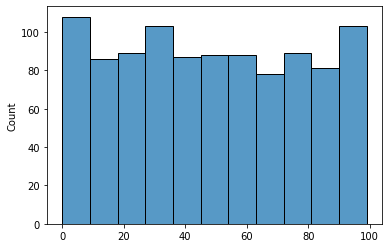

In [36]:
sns.histplot(data=age)

In [37]:
df =pd.DataFrame(data={'age':age})

In [38]:
df.head(5)

,age
0,80
1,91
2,3
3,67
4,69
